#Introduction to Classical Machine Learning
In this notebook, we will explore how to use and test classical Machine Learning algorithms including:
- Linear Regression
- K-Nearest Neighbors
- Decision Trees


In [ ]:
RANDOM_SEED=48
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Linear Regression
For this exercise, we will be using Boston Housing Prices dataset. It is a simple dataset with clear and explainable features, a perfect use case to demonstrate the power of Linear Regression.

In [ ]:
boston=datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
pd.DataFrame(boston.data,columns=boston.feature_names).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
pd.DataFrame(boston.target,columns=["target price"]).describe()

,target price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Before training our model, let's first split the data into train and test set:

In [ ]:
from sklearn.model_selection import train_test_split
boston_x_train,boston_x_test,boston_y_train,boston_y_test=train_test_split(boston.data,boston.target,random_state=RANDOM_SEED,train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
reg=linear_model.fit(boston_x_train,boston_y_train)

As discussed in the presentation, our performance metric for this regression model will be the **Root Mean Square Error (RMSE)**. 

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred=reg.predict(boston_x_train)
np.sqrt(mean_squared_error(boston_y_train,y_train_pred))

4.461834901168846

In [ ]:
y_test_pred=reg.predict(boston_x_test)
np.sqrt(mean_squared_error(boston_y_test,y_test_pred))

5.570853248821624

Let's try to go deeper and understand the weights that the model is assigning to each feature:

In [ ]:
import collections
features_importance=pd.Series(dict([(boston.feature_names[i],reg.coef_[i]) for i in range(len(boston.feature_names))]))

<BarContainer object of 13 artists>

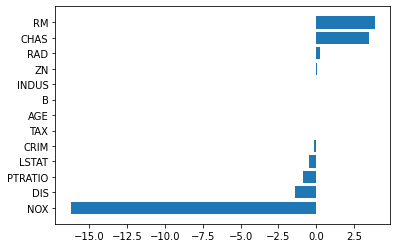

In [ ]:
import matplotlib.pyplot as plt
plt.barh(features_importance.sort_values().index,features_importance.sort_values().values)

## K-Nearest Neighbors


### Iris Dataset Classification Task

For our K-NN example, we will be using two simple datasets: the IRIS dataset and the BMI dataset. 
<hr>
Let's start with the IRIS dataset, a simple flower classification dataset based on the sepal and petal measurements. It is a perfect use case for K-NN because it is not highly dimensional and is easy to visualize. 

In [ ]:
iris=datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_x_train,iris_x_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,random_state=RANDOM_SEED,train_size=0.8)
iris_df=pd.DataFrame(iris_x_train,columns=iris.feature_names)
iris_df["species"]=iris_y_train
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.827500,3.061667,3.725000,1.192500,0.991667
std,0.860033,0.433896,1.788067,0.774289,0.824986
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.575000,0.300000,0.000000
50%,5.700000,3.000000,4.250000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.825000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Let's first try to visualize the features inside this dataset. We will use the Andrew curves plot for this application. Andrew Curves code the data into Fourier Series coefficients and transform each data instance into a sinusoidal graph.

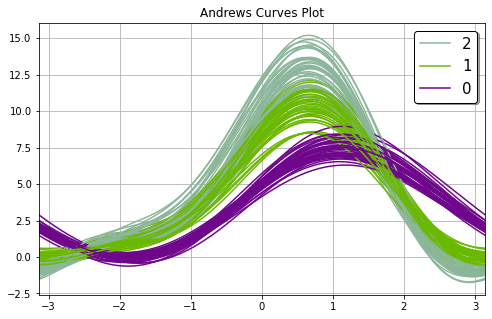

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(8,5))
andrews_curves(iris_df, "species")
plt.title('Andrews Curves Plot')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

It looks like the data instances are pretty separated, which is a good sign and will make the job easier on KNN.

Let's try next to plot the features and understand their distribution.

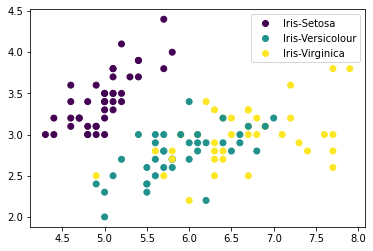

In [ ]:
scatter=plt.scatter(iris_df["sepal length (cm)"],iris_df["sepal width (cm)"],c=iris_df["species"],)
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

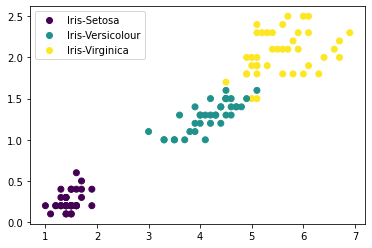

In [ ]:
scatter=plt.scatter(iris_df["petal length (cm)"],iris_df["petal width (cm)"],c=iris_df["species"],)
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

Now that we took a look on the data and undertsood a bit its structure, we can proceed into training our KNN model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(iris_x_train,iris_y_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred_iris=knn_model.predict(iris_x_train)
accuracy_score(iris_y_train,pred_iris)

0.975

In [ ]:
pred_iris=knn_model.predict(iris_x_test)
accuracy_score(iris_y_test,pred_iris)

0.9333333333333333

Another important step we need to investigate is the effect of the number of neighbors on our model performance:

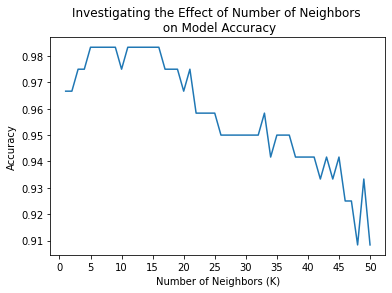

In [ ]:
from sklearn.model_selection import cross_val_score
neighbors_nb=np.arange(1,51)
acc=[]
for k in neighbors_nb:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, iris_x_train, iris_y_train, cv=10, scoring='accuracy')
  acc.append(scores.mean())

plt.plot(neighbors_nb,acc)
plt.xticks(np.arange(0,51,5))
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Investigating the Effect of Number of Neighbors \n on Model Accuracy")
plt.show()

### BMI Dataset Regression Task

Next, we investigate the BMI dataset, in which we try to predict the BMI index of 500 individuals based on their height and weight.

In [ ]:
!wget https://github.com/anisdismail/AI-Club-Workshops-2020-2021/blob/main/datasets/500_Person_Gender_Height_Weight_Index.csv

--2021-03-11 15:31:05--  https://github.com/anisdismail/AI-Club-Workshops-2020-2021/blob/main/datasets/500_Person_Gender_Height_Weight_Index.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘500_Person_Gender_Height_Weight_Index.csv.1’

500_Person_Gender_H     [ <=>                ] 224.08K  1.43MB/s    in 0.2s    

2021-03-11 15:31:06 (1.43 MB/s) - ‘500_Person_Gender_Height_Weight_Index.csv.1’ saved [229458]



In [ ]:
import pandas as pd
bmi=pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")
bmi.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
bmi.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Next let's go a bit deeper to better understand the BMI distribution and its relationship with other features:

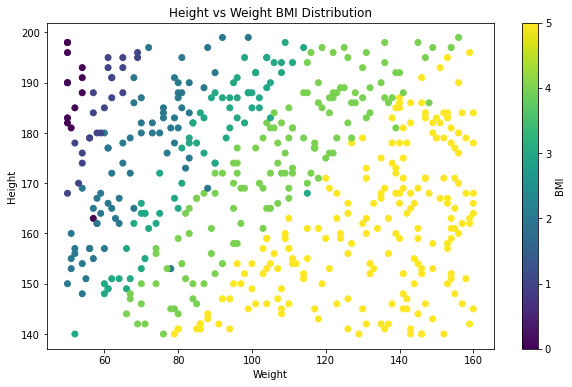

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
scatter=plt.scatter(bmi["Weight"],bmi["Height"],c=bmi["Index"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight BMI Distribution")
plt.colorbar(scatter,label="BMI")
plt.savefig("bmi scatter.png")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
scores=cross_val_score(knn, bmi.drop(["Index","Gender"],axis=1), bmi["Index"], cv=10, scoring='neg_mean_squared_error')
np.sqrt(-scores.mean())

0.3056795707926848

## Decision Trees

For the Decision Trees example, we will be using another famous example: the Wine Type classification dataset. This dataset will showcase the power of decision trees and how easy is to explain its results.

To simplify the tree built eventually, we selected the most correlated features with the target value, and we will be using them as our training dataset.

In [ ]:
wine=datasets.load_wine()
db_x_train,db_x_test,db_y_train,db_y_test=train_test_split(wine.data[:,[0,1,5,6,10]],wine.target,random_state=RANDOM_SEED,train_size=0.8)
db_df=pd.DataFrame(db_x_train,columns=np.array(wine.feature_names)[[0,1,5,6,10]])
db_df["type"]=db_y_train
db_df.describe()

,alcohol,malic_acid,total_phenols,flavanoids,hue,type
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,13.012183,2.315141,2.362254,2.111831,0.969085,0.873239
std,0.807130,1.098001,0.613461,0.993933,0.216631,0.770550
min,11.030000,0.740000,1.280000,0.470000,0.540000,0.000000
25%,12.370000,1.575000,1.860000,1.257500,0.812500,0.000000
50%,13.050000,1.830000,2.450000,2.265000,1.000000,1.000000
75%,13.705000,3.115000,2.800000,2.907500,1.120000,1.000000
max,14.830000,5.800000,3.880000,5.080000,1.710000,2.000000


In [ ]:
import seaborn as sns
db_df.corr()["type"]

alcohol         -0.359559
malic_acid       0.444214
total_phenols   -0.690754
flavanoids      -0.826636
hue             -0.597223
type             1.000000
Name: type, dtype: float64

Let's built the decision tree classifier, and we will be limiting the max depth of the tree to simplify the tree visualization later on.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3)
tree_clss=tree.fit(db_x_train,db_y_train)

In [ ]:
accuracy_score(db_y_train,tree_clss.predict(db_x_train))

0.971830985915493

In [ ]:
accuracy_score(db_y_test,tree_clss.predict(db_x_test))

0.9444444444444444

Now let's export the tree model and visualize it:

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
 tree_clss,
 out_file="db_tree.dot",
 feature_names=np.array(wine.feature_names)[[0,1,5,6,10]],
 class_names=wine.target_names,
 rounded=True,
 filled=True
 )

In [ ]:
!dot -Tpng db_tree.dot -o db_tree.png

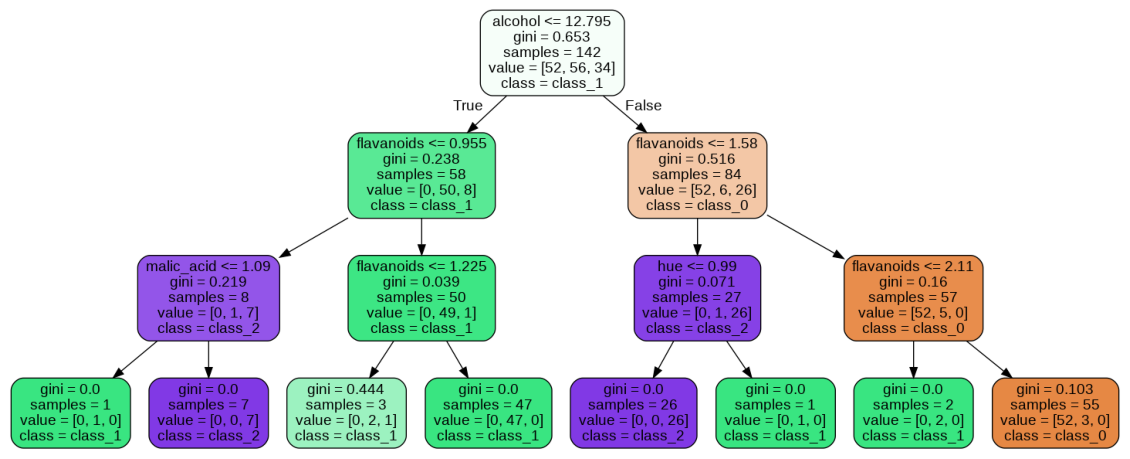

In [ ]:
from PIL import Image
image=Image.open("/content/db_tree.png")
plt.figure(figsize=(20,12))
plt.imshow(image)
plt.axis('off')
plt.show()

As simple as this, this showcase how explainable and transparent are the decisions made by such model. This makes Decision Trees a white-box model, in comparison to Black-box models like Neural Networks.

## Further Steps
This is the end of our workshop today! If you are curious to learn more and dive deeper into this notebook, here are some extra steps:
- Performing hyperparameters tuning for the models used
- Investigating the performance of the trained models using clearer metrics (like precision/recall vs accuracy)
- Adding the deleted features back and investigating whether their addition improves the models or not.
